following tutorial from https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [1]:
import pandas as pd
from nltk.corpus import stopwords
import re
from pprint import pprint
import gensim
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from gensim.utils import simple_preprocess
import spacy
import gensim.corpora as corpora
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
from lexicon import lexicon

In [2]:
topics_count = 5
csv_file = '2020-10-17.csv'

In [3]:
df = pd.read_csv(csv_file)
print(len(df))
print('\n'.join(df['text'][:10].values.tolist()))

121705
RT @jdmaccoby: Trump showed he can lose a debate all by himself
RT @DonaldJTrumpJr: Media will run cover for them but this is a very important point!
@56blackcat Biden couldn't get any sleazier. His record on racist policies and racist rants on the senate floor are disgusting.
RT @brettturner57: Trump went by my office today. My salute to the commander in cheat! https://t.co/5xXEK51oWJ
RT @RandyWr16505387: And look who they are all after * Donald Trump * . He's destroying their playhouse. https://t.co/LD8RBQjE6p
RT @KellyAngard: We need to hear more from John Kelly
TD Borah 

Capital 7
Borah 12

0:20 3rd Quarter

@CapitalBSD @CapitalEagleAt1 @idahosports @KTVBhss @michaellycklama
RT @funder: Network YouTube views as of 9pm

Biden: 507,445 ABC
Trump: 153,660 NBC
RT @BeingLiberal: Retweet if you #BlameTrump for the worst pandemic response on the face of the earth.
RT @jdmaccoby: Trump showed he can lose a debate all by himself


In [4]:
# NLTK Stop words
stop_words = stopwords.words('english')
stop_words.extend(['rt', 'https', 'http', 'from', 'subject', 're', 'edu', 'use'])

In [5]:
data = df['text'].values.tolist()
# Remove any urls
data = [re.sub(r'http\S+', '', sent) for sent in data]
# Remove words with less than 3 chars
data = [re.sub(r'\b\w{1,2}\b', '', sent) for sent in data]
# Remove new line characters
data = [re.sub(r'\s+', ' ', sent) for sent in data]
pprint(data[:10])

[' @jdmaccoby: Trump showed can lose debate all himself',
 ' @DonaldJTrumpJr: Media will run cover for them but this very important '
 'point!',
 "@56blackcat Biden couldn' get any sleazier. His record racist policies and "
 'racist rants the senate floor are disgusting.',
 ' @brettturner57: Trump went office today. salute the commander cheat! ',
 " @RandyWr16505387: And look who they are all after * Donald Trump * . ' "
 'destroying their playhouse. ',
 ' @KellyAngard: need hear more from John Kelly',
 ' Borah Capital Borah : 3rd Quarter @CapitalBSD @CapitalEagleAt1 @idahosports '
 '@KTVBhss @michaellycklama',
 ' @funder: Network YouTube views 9pm Biden: 507,445 ABC Trump: 153,660 NBC',
 ' @BeingLiberal: Retweet you #BlameTrump for the worst pandemic response the '
 'face the earth.',
 ' @jdmaccoby: Trump showed can lose debate all himself']


In [6]:
def sentences_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
data_words = list(sentences_to_words(data))
print(data_words[:10])

[['jdmaccoby', 'trump', 'showed', 'can', 'lose', 'debate', 'all', 'himself'], ['donaldjtrumpjr', 'media', 'will', 'run', 'cover', 'for', 'them', 'but', 'this', 'very', 'important', 'point'], ['blackcat', 'biden', 'couldn', 'get', 'any', 'sleazier', 'his', 'record', 'racist', 'policies', 'and', 'racist', 'rants', 'the', 'senate', 'floor', 'are', 'disgusting'], ['brettturner', 'trump', 'went', 'office', 'today', 'salute', 'the', 'commander', 'cheat'], ['randywr', 'and', 'look', 'who', 'they', 'are', 'all', 'after', 'donald', 'trump', 'destroying', 'their', 'playhouse'], ['kellyangard', 'need', 'hear', 'more', 'from', 'john', 'kelly'], ['borah', 'capital', 'borah', 'rd', 'quarter', 'capitalbsd', 'capitaleagleat', 'idahosports', 'ktvbhss', 'michaellycklama'], ['funder', 'network', 'youtube', 'views', 'pm', 'biden', 'abc', 'trump', 'nbc'], ['beingliberal', 'retweet', 'you', 'blametrump', 'for', 'the', 'worst', 'pandemic', 'response', 'the', 'face', 'the', 'earth'], ['jdmaccoby', 'trump', 's

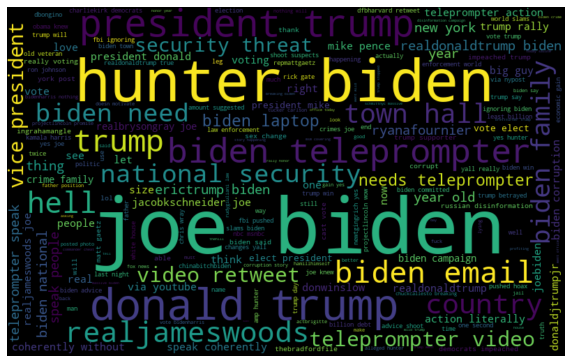

In [7]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join([item for sublist in data_words for item in sublist]))

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [8]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

nlp = spacy.load('en', disable=['parser', 'ner'])

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [9]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
print('nostops', data_words_nostops[:10])
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized_words = lemmatization(data_words_nostops, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print('lemmatized', data_lemmatized_words[:10])

nostops [['jdmaccoby', 'trump', 'showed', 'lose', 'debate'], ['donaldjtrumpjr', 'media', 'run', 'cover', 'important', 'point'], ['blackcat', 'biden', 'get', 'sleazier', 'record', 'racist', 'policies', 'racist', 'rants', 'senate', 'floor', 'disgusting'], ['brettturner', 'trump', 'went', 'office', 'today', 'salute', 'commander', 'cheat'], ['randywr', 'look', 'donald', 'trump', 'destroying', 'playhouse'], ['kellyangard', 'need', 'hear', 'john', 'kelly'], ['borah', 'capital', 'borah', 'rd', 'quarter', 'capitalbsd', 'capitaleagleat', 'idahosports', 'ktvbhss', 'michaellycklama'], ['funder', 'network', 'youtube', 'views', 'pm', 'biden', 'abc', 'trump', 'nbc'], ['beingliberal', 'retweet', 'blametrump', 'worst', 'pandemic', 'response', 'face', 'earth'], ['jdmaccoby', 'trump', 'showed', 'lose', 'debate']]
lemmatized [['show', 'lose', 'debate'], ['run', 'cover', 'important', 'point'], ['biden', 'get', 'sleazy', 'record', 'racist', 'policy', 'racist', 'rant', 'floor', 'disgust'], ['go', 'office', 

In [10]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized_words)
# Create Corpus
texts = data_lemmatized_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Save dictionary and corpus
id2word.save_as_text('id2word.txt')
corpora.MmCorpus.serialize('corpus.mm', corpus)

# View
print(corpus[:10])
print([[(id2word[id], freq) for id, freq in cp] for cp in corpus[:10]])

[[(0, 1), (1, 1), (2, 1)], [(3, 1), (4, 1), (5, 1), (6, 1)], [(7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1)], [(16, 1), (17, 1), (18, 1)], [(19, 1), (20, 1)], [(21, 1)], [(22, 1), (23, 1), (24, 1), (25, 1)], [(26, 1)], [(27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1)], [(0, 1), (1, 1), (2, 1)]]
[[('debate', 1), ('lose', 1), ('show', 1)], [('cover', 1), ('important', 1), ('point', 1), ('run', 1)], [('biden', 1), ('disgust', 1), ('floor', 1), ('get', 1), ('policy', 1), ('racist', 2), ('rant', 1), ('record', 1), ('sleazy', 1)], [('go', 1), ('office', 1), ('today', 1)], [('destroy', 1), ('look', 1)], [('need', 1)], [('capitalbsd', 1), ('capitaleagleat', 1), ('idahosport', 1), ('quarter', 1)], [('network', 1)], [('bad', 1), ('blametrump', 1), ('earth', 1), ('face', 1), ('pandemic', 1), ('response', 1), ('retweet', 1)], [('debate', 1), ('lose', 1), ('show', 1)]]


In [28]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=topics_count, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=1000,
                                           passes=1,
                                           alpha='auto',
                                           per_word_topics=True,
                                           minimum_probability=0.10,
                                           minimum_phi_value=0.10)
# Save model to disk.
lda_model.save("model")

In [12]:
# load from saves
# id2word = corpora.Dictionary.load_from_text('id2word.txt')
# corpus = corpora.MmCorpus('corpus.mm')
# lda_model = gensim.models.ldamodel.LdaModel.load("model")

In [29]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]
# doc_lda

[(0,
  '0.040*"hell" + 0.030*"major" + 0.027*"post" + 0.027*"breitbartnew" + '
  '0.020*"true" + 0.018*"blast" + 0.018*"union" + 0.018*"endorsement" + '
  '0.016*"support" + 0.016*"trump"'),
 (1,
  '0.032*"day" + 0.029*"trump" + 0.029*"get" + 0.027*"know" + 0.024*"go" + '
  '0.020*"give" + 0.020*"today" + 0.018*"delete" + 0.016*"time" + '
  '0.015*"call"'),
 (2,
  '0.062*"realdonaldtrump" + 0.044*"realjameswood" + 0.041*"make" + '
  '0.029*"threat" + 0.028*"security" + 0.027*"trump" + 0.025*"want" + '
  '0.025*"live" + 0.023*"biden" + 0.023*"vote"'),
 (3,
  '0.054*"trump" + 0.031*"biden" + 0.029*"story" + 0.026*"lie" + 0.023*"would" '
  '+ 0.021*"think" + 0.019*"country" + 0.018*"else" + 0.018*"lose" + '
  '0.017*"report"'),
 (4,
  '0.084*"trump" + 0.055*"year" + 0.031*"link" + 0.029*"corporation" + '
  '0.027*"vote" + 0.025*"rally" + 0.022*"good" + 0.021*"decency" + '
  '0.018*"really" + 0.016*"partisanship"')]


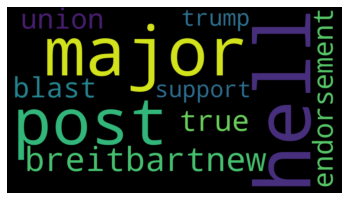

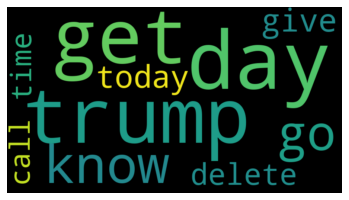

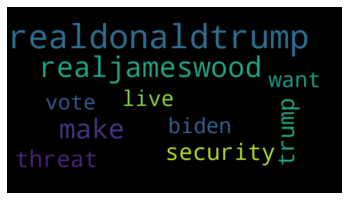

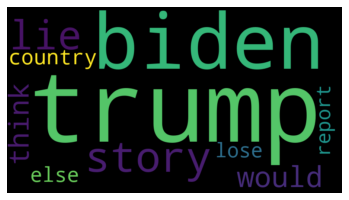

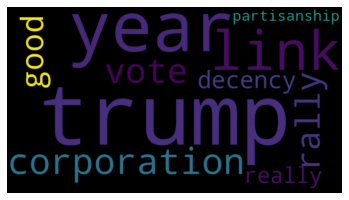

In [30]:
t = lda_model.show_topics(formatted=False)
for x in t:
    word_freq = dict(x[1])
    wordcloud = WordCloud(width=900,height=500, max_words=1628,normalize_plurals=False).generate_from_frequencies(word_freq)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [31]:
len(lexicon.keys())
topic_sentiment = []
for topic in t:
    topic_sentiment.append(sum(lexicon.get(word, 0) for [word, prob] in topic[1]))
    for [word, prob] in topic[1]:
        print(word, lexicon.get(word, 0))
    print(',')
# print([(word, lexicon.get(word, 0)) for topic in t for [word, prob] in topic[1]])
print(topic_sentiment)

# print(lda_model.get_topics())
doc_topics = lda_model.get_document_topics(id2word.doc2bow(texts[0]))
# print(doc_topics)
print(sum(topic_sentiment[i] * topic_dist for [i, [topic_id, topic_dist]] in enumerate(doc_topics)))
df['sentiment_from_topic'] = [sum(topic_sentiment[i] * topic_dist for [i, [topic_id, topic_dist]] in enumerate(lda_model.get_document_topics(id2word.doc2bow(text)))) for text in texts]
print(df[:5])

hell -0.766
major 0
post 0.016
breitbartnew 0
true 0
blast 0
union 0
endorsement 0.484
support 0.672
trump 0
,
day -0.094
trump 0
get 0.453
know 0.0
go -0.016
give 0.328
today 0
delete 0
time 0.078
call 0.203
,
realdonaldtrump 0
realjameswood 0
make 0.063
threat 0
security 0
trump 0
want 0.359
live 0.109
biden 0
vote 0.516
,
trump 0
biden 0
story -0.094
lie -0.661
would 0
think 0.391
country 0
else 0
lose -0.563
report 0
,
trump 0
year 0.047
link 0.25
corporation 0
vote 0.516
rally 0
good 0.656
decency 0
really 0
partisanship 0
,
[0.406, 0.952, 1.0470000000000002, -0.9269999999999999, 1.4689999999999999]
0.7442721825540066
              tweet_id                                               text  \
0  1317253983891722240  RT @jdmaccoby: Trump showed he can lose a deba...   
1  1317253983711494144  RT @DonaldJTrumpJr: Media will run cover for t...   
2  1317253984101519360  @56blackcat Biden couldn't get any sleazier. H...   
3  1317253984072036353  RT @brettturner57: Trump went by my o

In [32]:
print('MEAN OF ALL SENTIMENTS FROM TOPIC', df['sentiment_from_topic'].mean())

MEAN OF ALL SENTIMENTS FROM TOPIC 0.5300744875054179


### Scores and visualization (we probably won't need these)
I'm also not sure why the visualization's topics terms (right side bar chart) are different from the model's topics (the wordclouds above)

In [33]:
from gensim.models import CoherenceModel

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)
print('\nPer topic coherence score: ', coherence_model_lda.get_coherence_per_topic())


Perplexity:  -7.526141884077409

Coherence Score:  0.44270634557440536

Per topic coherence score:  [0.5555453167704592, 0.42738672257037635, 0.42981934180654163, 0.324879815842647, 0.4759005308820027]


In [34]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.129540 -0.133304       1        1  24.172190
2     -0.219721  0.280675       2        1  23.192524
1      0.158256 -0.185055       3        1  19.321629
4     -0.116466 -0.146487       4        1  16.920168
0      0.307472  0.184171       5        1  16.393488, topic_info=                Term         Freq         Total Category  logprob  loglift
298  realdonaldtrump  6328.000000   6328.000000  Default  30.0000  30.0000
217             year  4184.000000   4184.000000  Default  29.0000  29.0000
124    realjameswood  4445.000000   4445.000000  Default  28.0000  28.0000
114             make  4271.000000   4271.000000  Default  27.0000  27.0000
78              hell  2848.000000   2848.000000  Default  26.0000  26.0000
..               ...          ...           ...      ...      ...      ...
10               get  1085.153076   3560.646240   Topic5  -4.1942   0.6201
62             trump  1157.174438  18359.802734   Topic5  -4.1300  -0.9559
2               show   474.422882    553.736450   Topic5  -5.0216   1.6537
7              biden   641.005615   6305.555664   Topic5  -4.7207  -0.4779
150            email   488.957428   1214.959351   Topic5  -4.9914   0.8981

[245 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
250       4  0.998563      able
950       1  0.998744   account
326       1  0.999296  actually
96        1  0.999300       ago
142       5  0.998692     agree
...     ...       ...       ...
509       3  0.999108     world
288       1  0.999685     would
413       4  0.997197     wrong
217       3  0.031784      year
217       4  0.968090      year

[293 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 2, 5, 1])